# <center>Network Science</center>

## <center>Home Assignment #1: Power law</center>

### <center>Student: Ruslan Kireev</center>

#### <hr /> General Information

**Due Date:** 08.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1.

Load [wordcounts](http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt) dataset. 
1. Check that Zipf's Law holds
2. Assuming that the data is distributed according to the Power Law, find
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$
3. Produce summary of the frequencies: min, max, mean, median

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import urllib
%matplotlib inline
data = urllib.urlopen('http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt')
words = np.loadtxt(data,dtype={'names': ('freq', 'word'),'formats': (np.int,'|S15')})

To check if Zipf's law holds let's calculate residual, plot it and see:

In [2]:
subs = []
freq_sum = 1.0*np.sum(words['freq'])
for i in xrange(1,words.shape[0]+1):
    subs.append(abs(words[i-1][0]/freq_sum-1.0/i))

(0, 200, 0, 1)

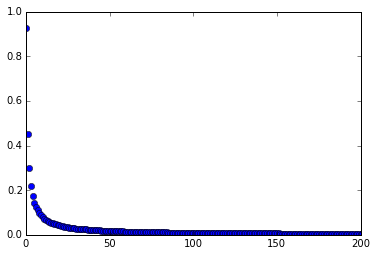

In [3]:
plt.plot(subs, 'o')
plt.axis((0,200,0,1))

As it could be seen just looking on the head of the data, it doesn't precisely holds in the beginning. 
So the plot demonstrates with growth of the rank the error of the law decreasing. Generally, the law works.

Assuming power law distribution, in log-log it would be a line, so we can compute $\alpha$ using linear regression ($\alpha$ is a slope of the regression line):

alpha: -1.18426529343


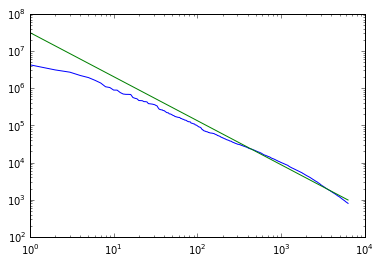

In [4]:
x = np.log(np.arange(1,words.shape[0]+1))
y = np.log(words['freq'])
A = np.vstack([x, np.ones(len(x))]).T
alpha, c = np.linalg.lstsq(A, y)[0]

plt.loglog(words['freq'])
plt.loglog(np.exp(x), np.exp(alpha*x+c))
print 'alpha:', alpha

As we know from lectures if $\alpha<3$ (in our case it is: $1.184<3$) then the variance depends on the sample size. 
Besides, our $\alpha$ estimation is far from perfect.
To check that -- compute empirical variance and variance assuming power law and make sure they differ

In [5]:
print 'Empirical variance:', (np.std(words['freq']))**2
mean = ((-alpha-1)/(alpha-2))*(800-(800**(-alpha-1))/(6187267**(-alpha-2)))
print 'Power Law variance:', np.mean((words['freq']-mean)**2)

Empirical variance: 15360778764.5
Power Law variance: 18403694534.0


Summary of the frequencies

In [6]:
print 'min:', np.min(words['freq'])
print 'max:', np.max(words['freq'])
print 'mean:', np.mean(words['freq'])
print 'median:', np.median(words['freq'])

min: 800
max: 6187267
mean: 13566.6707819
median: 2335.0


### <hr /> Task 2.

Find and plot PDF and CDF for the following networks:
* [Routing network](http://www.leonidzhukov.net/hse/2015/networks/data/network.txt)
* [Web graph](http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt)
* [Facebook network](http://www.leonidzhukov.net/hse/2015/networks/data/fb_Princeton.txt)


1. Are they correspondent to power law?
2. Find max and mean values of incoming and outcoming node degrees
3. Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$
4. Determine $x_{min}$ via Kolmogorov-Smirnov test

Firstly, load the data

In [7]:
data = urllib.urlopen('http://www.leonidzhukov.net/hse/2015/networks/data/network.txt')
network = np.loadtxt(data,dtype={'names': ('from', 'to'),'formats': (np.int,np.int)})
data = urllib.urlopen('http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt')
stanford = np.loadtxt(data,dtype={'names': ('from', 'to'),'formats': (np.long,np.long)})
data = urllib.urlopen('http://www.leonidzhukov.net/hse/2015/networks/data/fb_Princeton.txt')
princeton = np.loadtxt(data,dtype={'names': ('from', 'to'),'formats': (np.int,np.int)})

Compute charachteristics such mean, max. Secondly, find degree distribution and find PRF and CDF.
Well known, that power law in log-log scale would be line-alike. So computing that we can define how far the data from power law distribution

Out max: 2389
Out mean: 12.4004096262
In max: 40
In mean: 2.10967376628


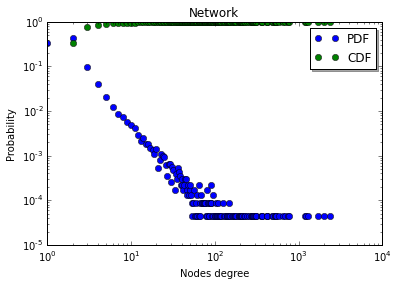

In [8]:
#Search for in-degree and out-degree
y = np.bincount(network['from'])
ii = np.nonzero(y)[0]
print 'Out max:', np.max(y[ii])
print 'Out mean:', np.mean(y[ii])
y = np.bincount(network['to'])
ii = np.nonzero(y)[0]
print 'In max:', np.max(y[ii])
print 'In mean:', np.mean(y[ii])

#Group by ids
y = np.bincount(np.hstack((network['from'],network['to'])))
ii = np.nonzero(y)[0]
#Group by degrees
ny = np.bincount(y[ii])
network_degree = np.nonzero(ny)[0]
network_num_of_nodes = ny[network_degree]

network_pdf = 1.0*network_num_of_nodes/np.sum(network_num_of_nodes)
network_cdf = np.zeros(network_pdf.shape[0])
curr_sum = 0
for i in range(network_pdf.shape[0]):
    network_cdf[i] = curr_sum
    curr_sum += network_pdf[i]
    
plt.loglog(network_degree,network_pdf, 'o', label='PDF')
plt.loglog(network_degree,network_cdf, 'o', label='CDF')
plt.ylabel('Probability')
plt.xlabel('Nodes degree')
plt.legend(loc='upper right', shadow=True)
plt.title('Network')

As we can see power law is good enough describes the network data.
Perform similar actions for the other two:

Out max: 247.0
Out mean: 12.9415501228
In max:

C:\Python27\lib\site-packages\ipykernel\__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Python27\lib\site-packages\ipykernel\__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


 3444.0
In mean: 3.64384694
[     0.  75558.  15128. ...,      0.      0.      0.]


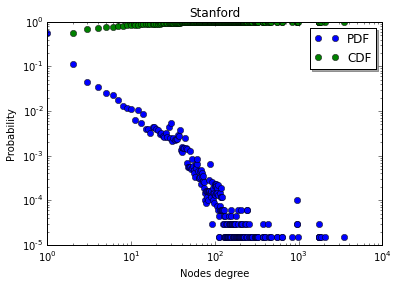

In [9]:
y = np.zeros(281904)
for a in stanford['from']:
    y[a]+=1
ii = np.nonzero(y)[0]
print 'Out max:', np.max(y[ii])
print 'Out mean:', np.mean(y[ii])
y = np.zeros(281904)
for a in stanford['to']:
    y[a]+=1
ii = np.nonzero(y)[0]
print 'In max:', np.max(y[ii])
print 'In mean:', np.mean(y[ii])

y = np.zeros(281904)
for a in stanford['to']:
    y[a]+=1
for a in stanford['from']:
    y[a]+=1
ii = np.nonzero(y)[0]
y=y[ii]
ny = np.zeros(28000)
for a in y:
    ny[a]+=1
for a in y:
    ny[a]+=1
print ny
stanford_degree = np.nonzero(ny)[0]
stanford_num_of_nodes = ny[stanford_degree]
stanford_pdf = 1.0*stanford_num_of_nodes/np.sum(stanford_num_of_nodes)
stanford_cdf = np.zeros(stanford_pdf.shape[0])
curr_sum = 0
for i in range(stanford_pdf.shape[0]):
    stanford_cdf[i] = curr_sum
    curr_sum += stanford_pdf[i]
    
plt.loglog(stanford_degree,stanford_pdf, 'o', label='PDF')
plt.loglog(stanford_degree,stanford_cdf, 'o', label='CDF')
plt.ylabel('Probability')
plt.xlabel('Nodes degree')
plt.legend(loc='upper right', shadow=True)
plt.title('Stanford')

Again -- power law likely holds

Out max: 543
Out mean: 75.0437908497
In max: 398
In mean: 37.5833060556


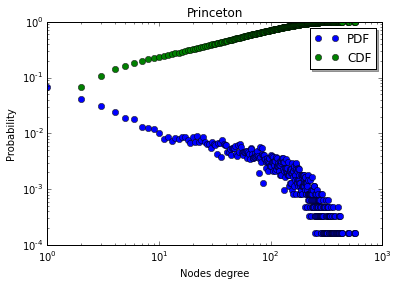

In [10]:
y = np.bincount(princeton['from'])
ii = np.nonzero(y)[0]
print 'Out max:', np.max(y[ii])
print 'Out mean:', np.mean(y[ii])
y = np.bincount(princeton['to'])
ii = np.nonzero(y)[0]
print 'In max:', np.max(y[ii])
print 'In mean:', np.mean(y[ii])

y = np.bincount(np.hstack((princeton['from'],princeton['to'])))
ii = np.nonzero(y)[0]
ny = np.bincount(y[ii])
princeton_degree = np.nonzero(ny)[0]
princeton_num_of_nodes = ny[princeton_degree]
princeton_pdf = 1.0*princeton_num_of_nodes/np.sum(princeton_num_of_nodes)
princeton_cdf = np.zeros(princeton_pdf.shape[0])
curr_sum = 0
for i in range(princeton_pdf.shape[0]):
    princeton_cdf[i] = curr_sum
    curr_sum += princeton_pdf[i]

plt.loglog(princeton_degree,princeton_pdf, 'o', label='PDF')
plt.loglog(princeton_degree,princeton_cdf, 'o', label='CDF')
plt.ylabel('Probability')
plt.xlabel('Nodes degree')
plt.legend(loc='upper right', shadow=True)
plt.title('Princeton')

Here we can see rather a curve, then a line. So it's debatable to be a power law. Further we make sure there is no good estimation.

Using ML method and KS test let's try to find good estimation of the data. Find $\alpha$, $x_{min}$ and $\sigma^2$

Distance: 0.150739077246
x_min: 125.0
alpha: 2.08149740487
Sigma2: 0.0188651070443


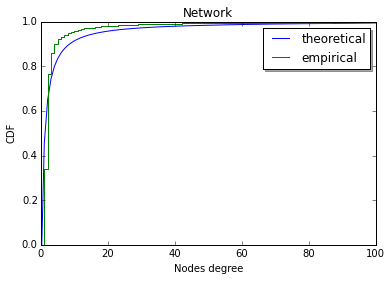

In [11]:
glob_min = np.inf
min_max = np.inf
best_alpha = 0
sigm2 = 0
#searching for best x_min due to KS test
for x_min in network_degree:
    x_min = 1.0*x_min
    sample = network_degree[network_degree>=x_min]
    alpha = 1+sample.shape[0]*(np.sum(np.log(sample/x_min)))**(-1)
    #possible estimation via Maximum Likelihood method
    network_cdf_est = (network_degree/x_min)**(-alpha+1)/network_degree.shape[0]
    if np.max(abs(network_cdf + network_cdf_est - 1))<min_max: #KS test
        min_max = np.max(abs(network_cdf + network_cdf_est - 1))
        best_alpha = alpha
        glob_min = x_min
        sigm2 = ((alpha-1)**2)/sample.shape[0]

#Results and plots
print 'Distance:', min_max
print 'x_min:', glob_min
print 'alpha:', best_alpha
print 'Sigma2:', sigm2
network_cdf_est = (network_degree/glob_min)**(-best_alpha+1)/network_degree.shape[0]
plt.plot(1-network_cdf_est,  label='theoretical')
plt.step(network_degree, network_cdf,  label='empirical')
plt.axis((0,100,0,1))
plt.ylabel('CDF')
plt.xlabel('Nodes degree')
plt.legend(loc='upper right', shadow=True)
plt.title('Network')

Distance: 0.0996602097333
x_min: 100.0
alpha: 2.20987243262
Sigma2: 0.0100259678302


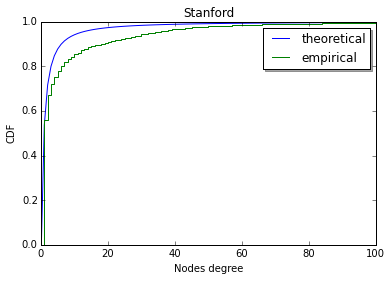

In [12]:
glob_min = np.inf
min_max = np.inf
best_alpha = 0
sigm2 = 0
for x_min in stanford_degree:
    x_min = 1.0*x_min
    sample = stanford_degree[stanford_degree>=x_min]
    alpha = 1+sample.shape[0]*(np.sum(np.log(sample/x_min)))**(-1)
    stanford_cdf_est = (stanford_degree/x_min)**(-alpha+1)/stanford_degree.shape[0]
    if np.max(abs(stanford_cdf + stanford_cdf_est - 1))<min_max:
        min_max = np.max(abs(stanford_cdf + stanford_cdf_est - 1))
        best_alpha = alpha
        glob_min = x_min
        sigm2 = ((alpha-1)**2)/sample.shape[0]

print 'Distance:', min_max
print 'x_min:', glob_min
print 'alpha:', best_alpha
print 'Sigma2:', sigm2
stanford_cdf_est = (stanford_degree/glob_min)**(-best_alpha+1)/stanford_degree.shape[0]
plt.plot(1-stanford_cdf_est,  label='theoretical')
plt.step(stanford_degree, stanford_cdf,  label='empirical')
plt.axis((0,100,0,1))
plt.ylabel('CDF')
plt.xlabel('Nodes degree')
plt.legend(loc='upper right', shadow=True)
plt.title('Stanford')

Distance: 0.690280220196
x_min: 112.0
alpha: 2.35583274364
Sigma2: 0.00723733239658


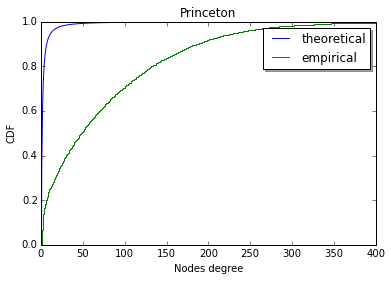

In [13]:
glob_min = np.inf
min_max = np.inf
best_alpha = 0
sigm2 = 0
for x_min in princeton_degree:
    x_min = 1.0*x_min
    sample = princeton_degree[princeton_degree>=x_min]
    alpha = 1+sample.shape[0]*(np.sum(np.log(sample/x_min)))**(-1)
    princeton_cdf_est = (princeton_degree/x_min)**(-alpha+1)/princeton_degree.shape[0]
    if np.max(abs(princeton_cdf + princeton_cdf_est - 1))<min_max:
        min_max = np.max(abs(princeton_cdf + princeton_cdf_est - 1))
        best_alpha = alpha
        glob_min = x_min
        sigm2 = ((alpha-1)**2)/sample.shape[0]

print 'Distance:', min_max
print 'x_min:', glob_min
print 'alpha:', best_alpha
print 'Sigma2:', sigm2
princeton_cdf_est = (princeton_degree/glob_min)**(-best_alpha+1)/princeton_degree.shape[0]
plt.plot(1-princeton_cdf_est,  label='theoretical')
plt.step(princeton_degree, princeton_cdf,  label='empirical')
plt.axis((0,400,0,1))
plt.ylabel('CDF')
plt.xlabel('Nodes degree')
plt.legend(loc='upper right', shadow=True)
plt.title('Princeton')

For network and stanford data we found estimators with quite low errors and satisfiable pictures. Although for princeton data (as we assume to be quite non-power law) the error even smaller, but the picture illustrates bad estimation on the left side, probably it can be explained with high density of dots around the mean value.